# Beispiel aus le1_eigenwerte_und_eigenvektoren.pdf 3.2 (Seite 8)

In [4]:
import numpy as np
import sympy as sp
from sympy.solvers.solveset import linsolve

In [18]:
B = sp.Matrix([[0,0,-2],[1,2,1],[1,0,3]])
B_numpy = np.array([[0,0,-2],[1,2,1],[1,0,3]])


## Manuelles Berechnen der Eigenvektoren und Eigenwerten

In [7]:
# Determinante berechnen
def Eigenwert(m): 
    size = m.shape[0]
    l = sp.symbols("l") # l wie lambda
    I = np.eye(size) # Einheitsmatrix
    I_1 = sp.Matrix(I) # Einheitsmatrix as sympy Matrix
    det = sp.det(m-l*I_1)

    # Werte für lambda berechnen = Eigenwerte, jedoch ohne algebraische Vielfachheit
    return sp.solve(det)

ew = Eigenwert(B)

print(ew)



[1.00000000000000, 2.00000000000000]


In [8]:
# Berechnen der Eigenvektoren
def Eigenvektor(ew,m):
    # Matrix - dem ersten Eigenwert
    M = m - ew*np.eye(m.shape[0])
    # Erweiterte Koeffizientenmatrix
    M = np.append(M,([[0]] * m.shape[0]),1)
    # LGS lösen
    #x,y,z = sp.symbols('x y z')
    return linsolve(sp.Matrix(M))

Eigenvektor(ew[0],B)
#Eigenvektor(ew[1],B)


FiniteSet((-2.0*tau0, 1.0*tau0, tau0))

In [13]:
# Alternativ mit sp.solve

def sp_eigenvektor(ew):
    x,y,z = sp.symbols('x y z')
    return sp.solve((B - ew*np.eye(3))*sp.Matrix([[x],[y],[z]]) )

sp_eigenvektor(ew[0])

# Anschliessend noch Eigenvektoren bestimmen

{x: -2.0*z, y: z}

## Berechnung der Eigenvektoren und Eigenwerte mittels Numpy

In [19]:
ew_2, V = np.linalg.eig(B_numpy)
print('Eigenwerte: {0}, \n Eigenvektoren: \n {1}'.format(ew_2,V))

Eigenwerte: [2. 1. 2.], 
 Eigenvektoren: 
 [[ 0.         -0.81649658  0.70710678]
 [ 1.          0.40824829  0.        ]
 [ 0.          0.40824829 -0.70710678]]


In [20]:
# Diagonalmatrix der Eigenwerte
D = np.diag(ew_2)
print(D)

[[2. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]


In [21]:
# Berechnung der Inverse von V
Vi = np.linalg.inv(V)

print(Vi)

[[ 1.          1.          1.        ]
 [-2.44948974 -0.         -2.44948974]
 [-1.41421356 -0.         -2.82842712]]


In [22]:
# Nun sollte VDVi = B
np.round(V @ D @ Vi)

array([[ 0.,  0., -2.],
       [ 1.,  2.,  1.],
       [ 1.,  0.,  3.]])

# Uebung Aufgabe 15

In [23]:
A = sp.Matrix([[89, 75,22, 102],[75, 116, 27, 120],[22,27,33,62],[102,120,62,200]])
A_numpy = np.array([[89, 75,22, 102],[75, 116, 27, 120],[22,27,33,62],[102,120,62,200]])

In [25]:
# Aufage a
res = Eigenwert(A)

# Umwandung von Complex; runden auf 10 Nachkommastellen 
res_round = [round(complex(i).real,10) for i in res]

print(res_round)

[7.1630569063, 26.3371890658, 42.745931007, 361.7538230209]


In [31]:
# Lösung mit numpy
EW, EV = np.linalg.eig(A_numpy)

print('Eigenwerte: {0}, \n Eigenvektoren: \n {1}'.format(EW,EV))

Eigenwerte: [361.75382302  42.74593101  26.33718907   7.16305691], 
 Eigenvektoren: 
 [[-0.42552429 -0.42476765  0.76464379 -0.23199439]
 [-0.50507589 -0.54267519 -0.64193252 -0.19576676]
 [-0.20612674  0.54869183 -0.05515612 -0.80833585]
 [-0.72203822  0.4733005   0.01415338  0.50442752]]


In [28]:
# Berechnung der Eigenvektoren alle Eigenwerte
for i in res:
    print(Eigenvektor(i,A))

a,b,c,d = sp.symbols('a b c d')
sp.solve((A - (res[0]*np.eye(4)))*sp.Matrix([[a],[b],[c],[d]]))

# Fehlerhafte Berechnung aufgrund von Rundungsfehlern! 

FiniteSet((0, 0, 0, 0))
FiniteSet((0, 0, 0, 0))
FiniteSet((0, 0, 0, 0))
FiniteSet((0, 0, 0, 0))


{a: 0.0, b: 0.0, c: 0.0, d: 0.0}

In [65]:
# Überprüfuen von AEV = (lambda)*EV
print(np.dot(A,EV[:,0]))
print(np.dot(EW[0],EV[:,0]))

[-153.935040416947 -182.713133326046 -74.5671353967124 -261.200086200125]
[-153.93504042 -182.71313333  -74.5671354  -261.2000862 ]


In [70]:
# Aufgabe B
print(np.round(np.dot(EV[:,0],EV[:,1])))
print(np.round(np.dot(EV[:,0],EV[:,2])))
print(np.round(np.dot(EV[:,0],EV[:,3])))

# EV sind alle orthogonal


0.0
-0.0
-0.0


In [105]:
# Aufgabe C

# Berechnung der Inverse der "gestapelten" Eigenvektoren
EVi = np.linalg.inv(EV)

# Diagonalisierung der Matrix A
A_diag = EVi @ np.array(A) @ EV


In [135]:
# Aufgabe D
import time
#1
start = time.time()
A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A # gehts auch einfacher?
print('Matrix 20x Time: \n{0}'.format(time.time() - start))

#2
start = time.time()
EVi @ (A_diag ** 20) @ EV
print('Berechnung mit Diagonalmatrix: \n{0} '.format(time.time() - start))


#3
start = time.time()
np.linalg.matrix_power(A,20)
print('Berechnung mit np.linalg.matrix_power: \n{0} '.format(time.time() - start))


Matrix 20x Time: 
0.011512041091918945
Berechnung mit Diagonalmatrix: 
0.005700111389160156 
Berechnung mit np.linalg.matrix_power: 
0.0021467208862304688 


# Aufgabe 16

In [8]:
X = np.array([[-2,-4,-6,6,-8,6,3,6,8,-9,-1,1,4,2,2,2,-1,-1,2,2],[-3,-7,-13,16,-14,14,6,11,18,-19,5,0,3,3,6,8,-3,-1,0,9]])

X

array([[ -2,  -4,  -6,   6,  -8,   6,   3,   6,   8,  -9,  -1,   1,   4,
          2,   2,   2,  -1,  -1,   2,   2],
       [ -3,  -7, -13,  16, -14,  14,   6,  11,  18, -19,   5,   0,   3,
          3,   6,   8,  -3,  -1,   0,   9]])

In [5]:
import matplotlib.pyplot as plt

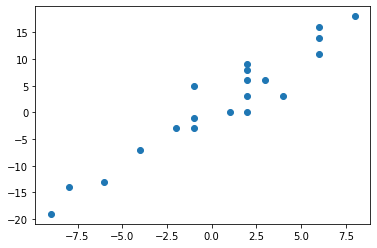

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X[0],X[1])

In [9]:
EW,EV = np.linalg.eig(np.dot(X,X.T))

print(f'Eigenvalues: {EW}\nEigenvectors: \n{EV}')

# Matrix ist symmetrisch

Eigenvalues: [  31.33064012 2341.66935988]
Eigenvectors: 
[[-0.91153928 -0.41121301]
 [ 0.41121301 -0.91153928]]


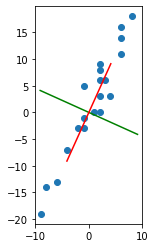

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X[0],X[1])
ax.plot([EV[:,0][0]*-10, EV[:,0][0]*10],[EV[:,0][1]*-10, EV[:,0][1]*10], color='green')
ax.plot([EV[:,1][0]*-10, EV[:,1][0]*10],[EV[:,1][1]*-10, EV[:,1][1]*10], color='red')
fig.gca().set_aspect('equal')
